# Running your quantum circuits on quantum hardware

### Step 0: Running with the `execute` function

In [1]:
%matplotlib inline
from qiskit import QuantumCircuit
from qiskit import IBMQ, execute
from qiskit.tools.jupyter import *
from qiskit.tools.monitor import *
from qiskit.quantum_info import Statevector
from qiskit.visualization import *
from qiskit import transpile, assemble

In [2]:
provider = IBMQ.load_account()
for backend in provider.backends():
    print(backend.name())

ibmq_valencia


In [3]:
backend = provider.get_backend('ibmq_valencia')
backend

<IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q-community', group='reservations', project='main')>

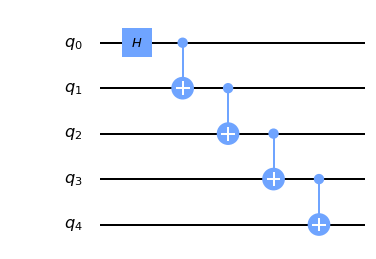

In [4]:
mycircuit = QuantumCircuit(5)
mycircuit.h(0)
mycircuit.cx(0,1)
mycircuit.cx(1,2)
mycircuit.cx(2,3)
mycircuit.cx(3,4)
mycircuit.draw()

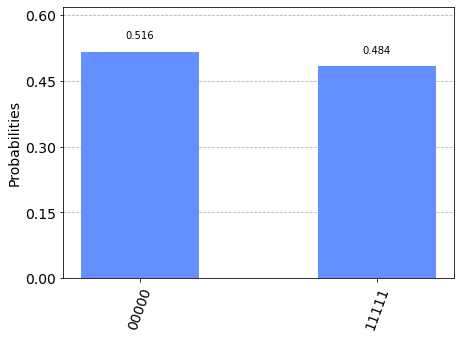

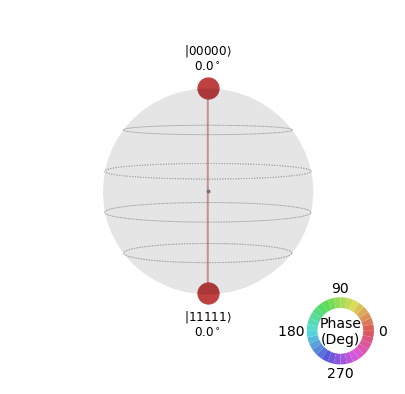

In [5]:
statevector = Statevector.from_instruction(mycircuit)
display(plot_histogram(statevector.sample_counts(shots=1000)))
display(plot_state_qsphere(statevector.data))

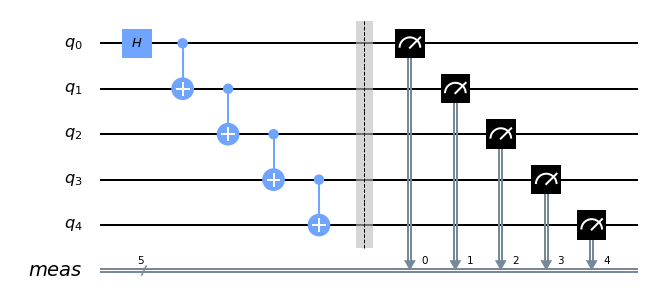

In [6]:
mycircuit.measure_all()
mycircuit.draw()

In [7]:
job = execute(mycircuit, backend, shots=1000)
job_monitor(job)

Job Status: job has successfully run


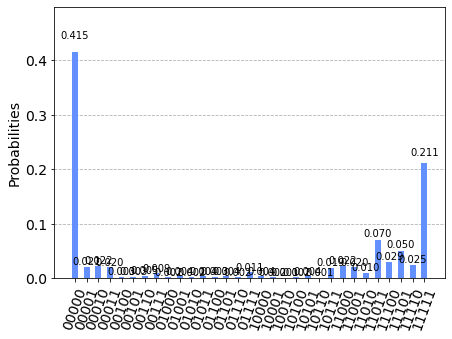

In [8]:
counts = job.result().get_counts(mycircuit)
plot_histogram(counts)

### Step 1: Understanding the intermediate steps in `execute`

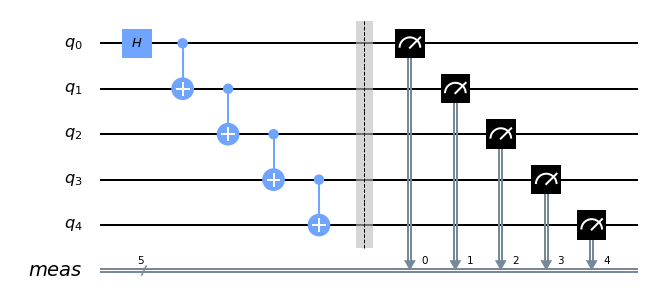

In [9]:
mycircuit.draw()

In [10]:
backend

<IBMQBackend('ibmq_valencia') from IBMQ(hub='ibm-q-community', group='reservations', project='main')>

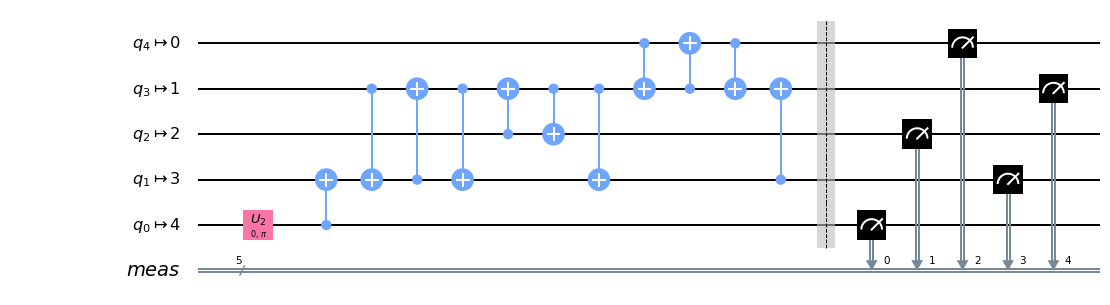

In [11]:
transpiled_mycircuit = transpile(mycircuit, backend)
transpiled_mycircuit.draw()

In [12]:
experiments = assemble(transpiled_mycircuit, shots=1000)

In [13]:
job = backend.run(experiments)

In [14]:
job_monitor(job)

Job Status: job has successfully run


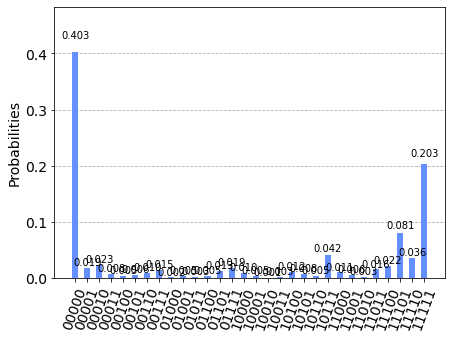

In [15]:
counts = job.result().get_counts(transpiled_mycircuit)
plot_histogram(counts)